AIRBNB Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.
Airbnb began in 2008 when two designers who had space to share hosted three travellers looking for a place to stay. Now, millions of hosts and travellers choose to create a free Airbnb account so they can list their space and book unique accommodation anywhere in the world.

Airbnb takes a unique approach toward lodging. Part of the “sharing economy,” Airbnb offers you someone’s home as a place to stay instead of a hotel. On Airbnb, you can find places to crash on your backpacking trip through Europe, or you can find a place to stay for a month during your internship in Los Angeles. It’s also a great way to explore a town you’re thinking about moving to, or finding an alternative to traditional hotel options in 2020 if you’re just around for a weekend. If you want to rent out extra space in your own home, you can host through Airbnb and make money for allowing a guest to stay the night.



With the above provided introduction , I will get started on my project .

The first thing to do is download the required packages for analysis, computing and plotting, doing it before hand ensures that we will have all the required packages beforehand and wouldn't have to download or install packages befor each plot.

In [ ]:
#importing libraries and packages required for analysis , in csv format 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#This is for ensuring that the plots are plotted in the next cell and not in a pop up box which is the default style
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

airbnb=pd.read_csv('/AB_NYC_2019.csv')

Now , we will clean the data and make it usefull for further analysis .
This includes , recognizing null values , and fixing them .
Along with cleaning of the data , we will look out for the basic information of the csv fil and explore it further . Before this step , let us explore the data a bit more .

In [ ]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Shape function determines the dimensions of the data frame .

In [ ]:
airbnb.shape 

(48895, 16)

Next we will check the data type of each column in the data frame .

In [ ]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [ ]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data.

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Dropping duplicate values is required to maintain the authenticity of data during analysis and modelling.We remove the duplicate values from the data frame so that each row has values to work with during analysis

In [ ]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [ ]:
airbnb.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. Heatmaps in Seaborn can be plotted by using the seaborn.heatmap() function.

Exploring the correlation between each data column in the dataset is necessary to understand if some columns are overly related to each other, if there are such columns, then there is no need for keeping all those columns, only one of those would do. Plotting heatmap also helps to understand which columns are related more to the target(Y value during modelling) column in the data frame.

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

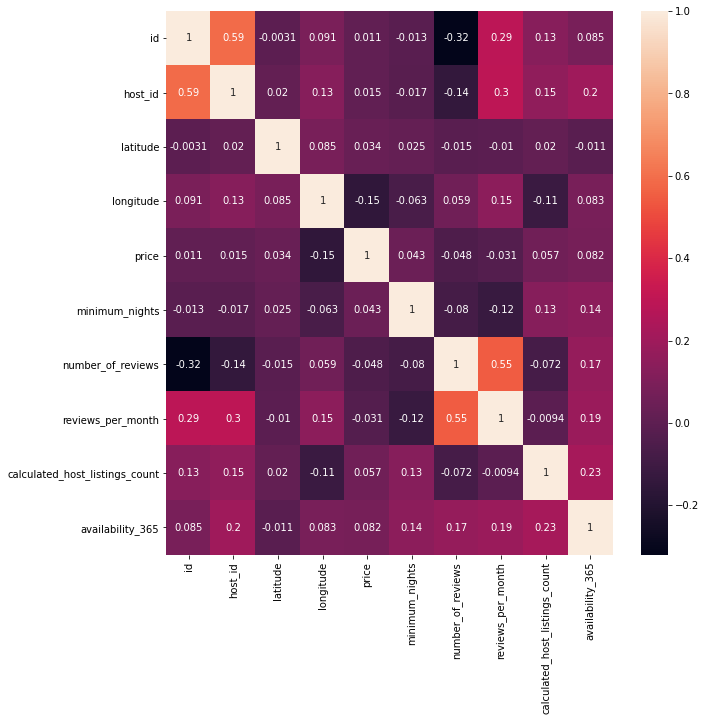

In [ ]:
corr=airbnb.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
airbnb.columns



*  What can you observe from the heatmap ?
-->> From the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among host_id to reveiws_per_month & availability_365

There's noticiable correlation between min_nights to no_of_listings_count & availability_365.

Price shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. item
*   There's noticiable correlation between min_nights to no_of_listings_count & availability_365.

Price shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. 



Now we can calculate the null values and draw insights from that 

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The above table shows the number of null values in each columns.Missing data that is observed does not need too much cleaning. Looking at the dataset we can say that columns "name" and "host_name" are insignificant , column "last_review" is date, if there were no reviews for the listing - date simply will not exist.

Dropping the insignificant values helps us work effectively with only the data that are essential for analysis.We coluld see from the heatmap that the columns that are dropped below dosent influence price very much and thus it is not necessary that it has to be included while modelling

In [ ]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


We require the reviews per month column for analysis and modelling, thus the null values are filled with 0 for avoiding issues while modelling.

In [ ]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)

airbnb.reviews_per_month.isnull().sum()

0

In [ ]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

It is required to know which catogery holds the maximum ratio of data

A Seaborn count plot is a graphical display to show the number of occurrences or frequency for each categorical data using bars

Text(0.5, 1.0, 'Neighbourhood Group')

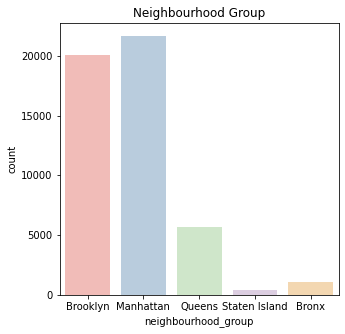

In [ ]:
sns.countplot(airbnb['neighbourhood_group'], palette="Pastel1")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Neighbourhood Group')

# **Prices for each neighborhood group**

Our primary task here is to create a price prediction model with the available data. Thus it is important to analyse the nature or behaviour of the data in the price column in each region and draw insights.

Analyzing the prices for each neighbourhood group seperately

In [ ]:
#analyzing prices for each neighborhood group
B=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_B=B[['price']]

#Manhattan
M=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan'] 
price_M=M[['price']]

#Queens
QA=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens'] 
price_Q=QA[['price']]

#Staten Island
S=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island'] 
price_S=S[['price']]

#Bronx
R=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx'] 
price_R=R[['price']]

#putting all the prices' dfs in the list
price_list=[price_B, price_M, price_Q, price_S, price_R]

We have actually collected the price data of each neighbourhood group separately into separate data frames.This will help in understanding the price variations in each region.

Creating a dataframe with statistics of price of each group.
Next we have created a data frame containing the statistical details of price value in each neighbourhood group.

In [ ]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group

l=[]
#creating list with known values in neighbourhood_group column

neib_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    l.append(i)

#changing names of the price column to the area name for easier reading of the table    
l[0].rename(columns={'price':neib_list[0]}, inplace=True)
l[1].rename(columns={'price':neib_list[1]}, inplace=True)
l[2].rename(columns={'price':neib_list[2]}, inplace=True)
l[3].rename(columns={'price':neib_list[3]}, inplace=True)
l[4].rename(columns={'price':neib_list[4]}, inplace=True)

#finilizing our dataframe for final view    
stat_df=l
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


We can see from the data frame that shows the price statistics that there are various extreme values for the prices in each neighborhood group
While modelling it is required that the values in every column dosent vary drastically, if it does then the predictions might not be accurate. So in the next plots we will filter out price values that fall in a particular range and exclude the outliers.



-----------X------------------X-----------------------X----------------------X----------------------------X---------------------X--------------------X-------------------X-------------------X----------------X-----------

Visualizing by excluding extreme values to get a proper and more accurate view of the price distribution across the neighborhood groups.

Filtering out price by excluding the outliers to find out the distribution of price in each neighbourhood group.

Text(0.5, 1.0, 'Density/distribution of prices for each neighberhood_group with no extreme values')

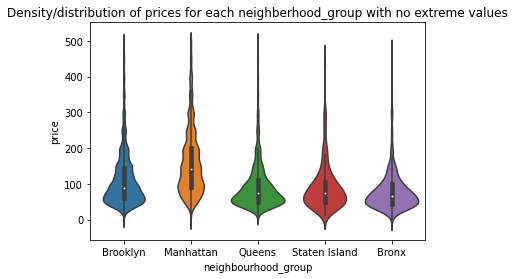

In [ ]:
#creating a sub-dataframe with no extreme values / less than 500
no_ext=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=no_ext, x='neighbourhood_group', y='price')
viz_2.set_title('Density/distribution of prices for each neighberhood_group with no extreme values')

 

*  violin plots are a method of plotting numeric data and can be considered a 
combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:
*  median (a white dot on the violin plot) , interquartile range (the black bar in the center of violin) the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. These values can be used in a simple outlier detection technique — observations lying outside of these “fences” can be considered outliers.









*   What insights can we draw from the data?
*   We can see from the plot that Manhattan is the most costliest place to live in even after filtering only reasonable price values out.Brooklyn has the second largest price distribution followed by Manhattan. Queens, Staten Island are on the same page with almost identical price distribution


-------------------------X------------------------------X----------------------------X-----------------------X-------------------------X---------------X-----------------X--------------------X-------------X-------------

# **Boxplot to potray the reltionship between the neighbourhood group and the availability of rooms**

A Boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

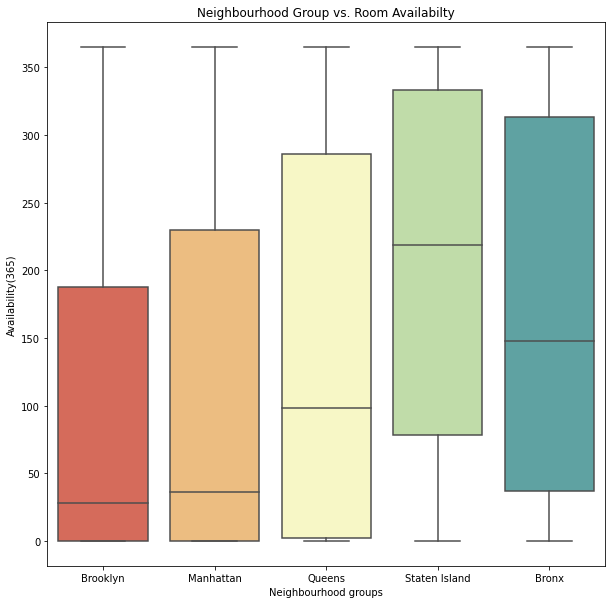

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='Spectral')
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()



*   Looking at the above categorical box plot we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year.
*   We can see that even though most of the data we have belong to Manhattan, i.e even if there are many more locations in manhattan where bookings are available the availability of rooms throughout the year is more for Staten Island.



----------------------------X------------------X---------------------X--------------X-------------------X-----------------X----------------------X-----------X---------------------X----------------X----------------

# **MAPS**

Regions belonging to each neighborhood group using the latitude and longtitude provided.
Now lets plot some maps, when it comes to data that links to latitude longtitude, locations etc. Visualizations and analysis are easier through maps . It is easier to understand distribution across all regions when we actually plot a map

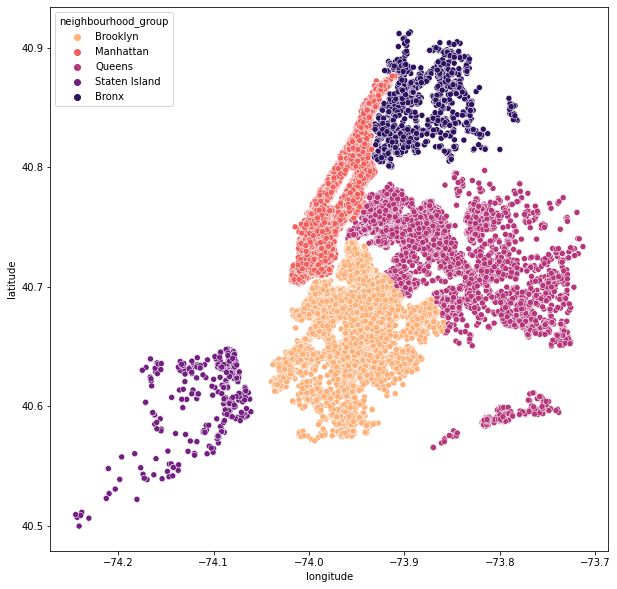

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group,palette='magma_r')
plt.ioff()



*   What do you understand from the above plot?
*   This is the plot of all the regions that belong to a particular neighbourhood group.Looking at the labels would give a better idea.


--------------------------X-------------------------------X--------------------------X--------------------------X------------------------X----------------X------------------------X-----------------------X---------------

# **Availbale roomtypes around all neighborhood groups to**

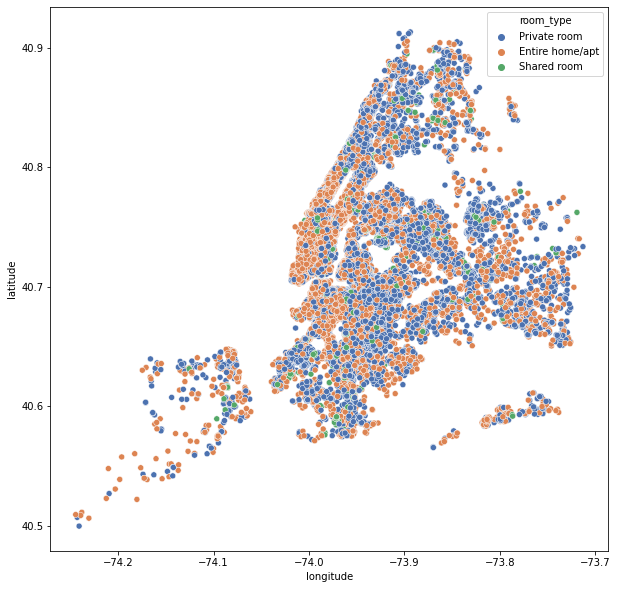

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type,palette='deep')
plt.ioff()

This shows the distribution of different room types actross different neighbourhood groups



*   What can we understand from the plot?
*   --> By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

--> 95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb



------------------------------X-------------------------------X-----------------------------X------------------------------X----------------------------------X----------------------------X-----

# **Availabilty of rooms across all neighbourhood groups together**

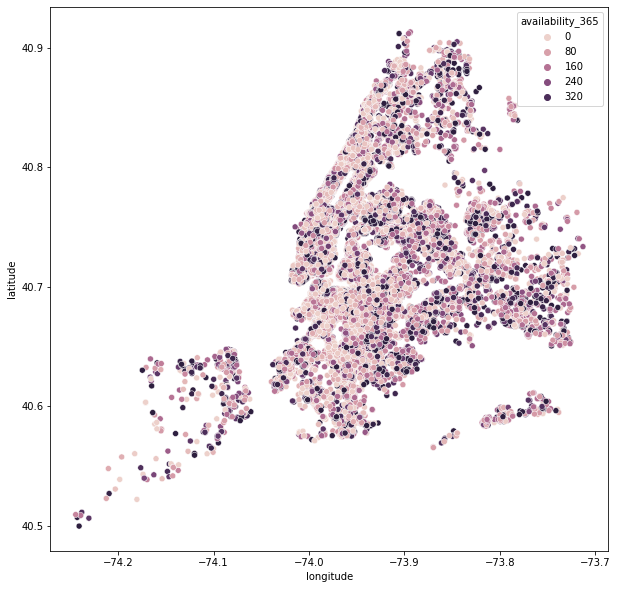

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

looks like Bronx & Staten Island has listings which are mostly available throughout the year, might be the case as they are not as expensive as compared to that in Manhanttan, Brooklyn & Queens




-------------------------------X----------------------------------X---------------------------X-------------------------------------X----------------------X-------------------X-------

# **Hist plots for prices in each neighborhood group**


*   A Histogram visualises the distribution of data over a continuous interval or certain time period. Each bar in a histogram represents the tabulated frequency at each interval/bin.Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. They are also useful for giving a rough view of the probability distribution

Creating as many subplots as the number of unique valuse in the neighborhood group column

Drawing histograms for price distribution for each neighbourhood group.
*   Creating as many subplots as the number of unique valuse in the neighborhood group column . Drawing histograms for price distribution for each neighbourhood group.



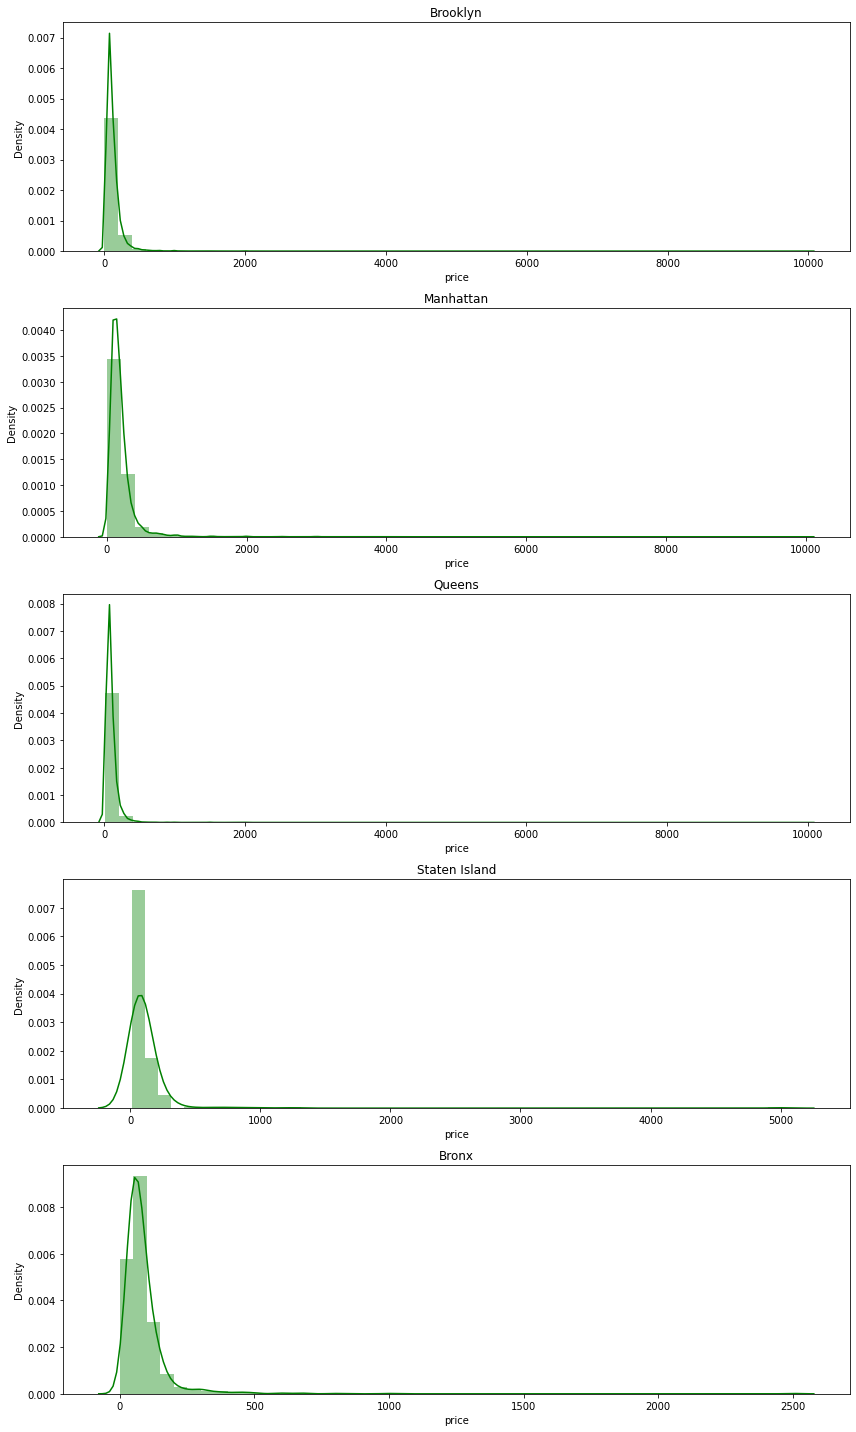

In [ ]:
f,subplots = plt.subplots(
                len(airbnb.neighbourhood_group.unique()), 
                figsize=(12, 20)
            )

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb[airbnb.neighbourhood_group == neighbourhood_group]['price']
    ax = subplots[i]
    dist_plot = sns.distplot(neighbourhoods, ax=ax,color='g')
    dist_plot.set_title(neighbourhood_group)

# Finalize the plot
plt.tight_layout(h_pad=1)
plt.show()

# Pairplots for the specified columns



*   Making a pairplot with few selected columns from the dataframe to analyze the distribution of each column with other parameters.
*   A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.



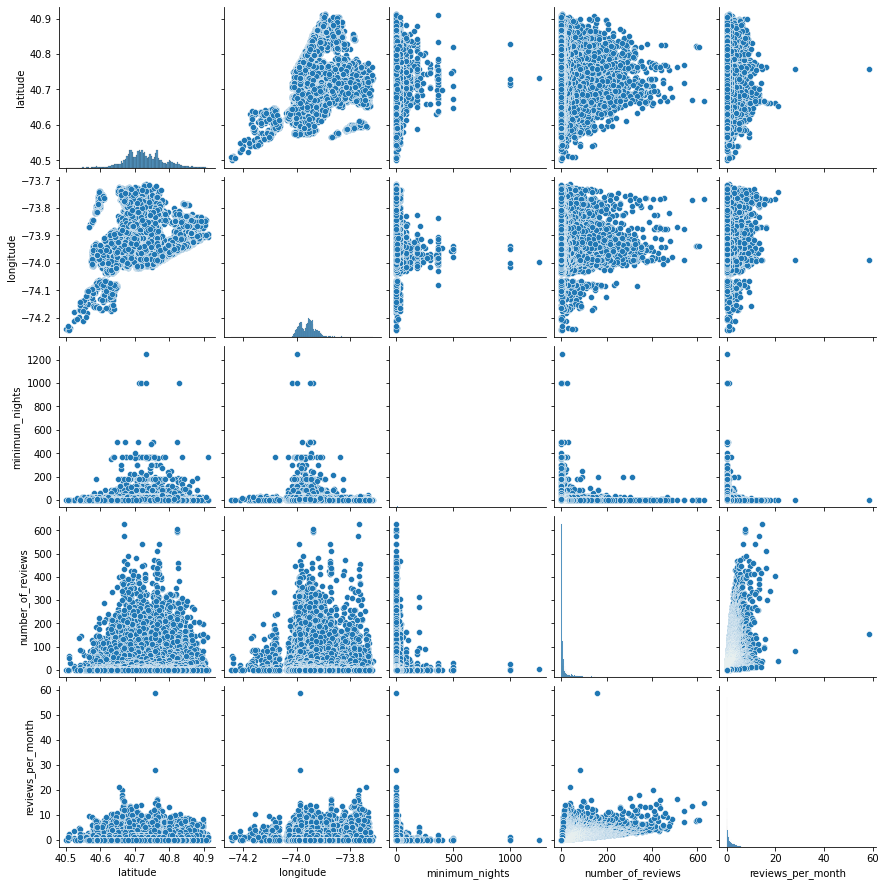

In [ ]:
df = airbnb[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month']]
sns.pairplot(df)

----------------------------X--------------------------------X-------------------------------X-------------------------------X--------------------------------------X----------------------------

# **MODELLING**

Modelling : Predictive modelling provides the ability to automatically create accurate predictive models about future. There are also options to choose the best solution with multi-modal evaluation.

Price predictions : Importing the packages required for modelling and predictions

In [ ]:
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,scale, StandardScaler, RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

--------------------------------X-------------------------------X---------------------------X-------------------------------X----------------------------X-------------X----------------

In [ ]:
lg_df=pd.read_csv('/AB_NYC_2019.csv')

In [ ]:
lg_df = pd.read_csv('/AB_NYC_2019.csv')

In [ ]:
lg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Determine the number of columns and rows in the dataframe**

In [ ]:
print('Number of features: {}'.format(lg_df.shape[1]))
print('Number of examples: {}'.format(lg_df.shape[0]))

Number of features: 16
Number of examples: 48895


In [ ]:
lg_df['last_review'] = pd.to_datetime(lg_df['last_review'],infer_datetime_format=True) 

**Preprocessing**

In [ ]:
total = lg_df.isnull().sum().sort_values(ascending=False)
percent = (lg_df.isnull().sum())/lg_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [ ]:
lg_df.drop(['host_name','name'], axis=1, inplace=True)


In [ ]:
lg_df[lg_df['number_of_reviews']== 0.0].shape

(10052, 14)

The NaN values in the last_review and reviews_per_month columns all occur for examples where no reviews were given.For reviews_per_month, fill those values with 0's.

In [ ]:
lg_df['reviews_per_month'] = lg_df['reviews_per_month'].fillna(0)
earliest = min(lg_df['last_review'])
lg_df['last_review'] = lg_df['last_review'].fillna(earliest)
lg_df['last_review'] = lg_df['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())
total = lg_df.isnull().sum().sort_values(ascending=False)
percent = (lg_df.isnull().sum())/lg_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
availability_365,0,0.0
calculated_host_listings_count,0,0.0
reviews_per_month,0,0.0
last_review,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0
longitude,0,0.0
latitude,0,0.0


The target has a highly skewed distribution. This can cause problems for machine learning algorithms. A log transformation and removal of outliers makes the distribution look much closer to normal.

In [ ]:
lg_df = lg_df[np.log1p(lg_df['price']) < 8]
lg_df= lg_df[np.log1p(lg_df['price']) > 3]
lg_df['minimum_nights'] = np.log1p(lg_df['minimum_nights'])

In [ ]:
lg_df['price'] = np.log1p(lg_df['price'])

In [ ]:
#Dropping the rows that are not required
lg_df = lg_df.drop(['host_id', 'id'], axis=1)

In [ ]:
#Filtering values based on certain values
lg_df['reviews_per_month'] = lg_df[lg_df['reviews_per_month'] < 17.5]['reviews_per_month']

**Feature engineering**

In [ ]:
#Making new necessary columns in the dataframe, ie by excluding the outliers and only taking only the required values
lg_df['all_year_avail'] = lg_df['availability_365']>353
lg_df['low_avail'] =lg_df['availability_365']< 12
lg_df['no_reviews'] =lg_df['reviews_per_month']==0

**Encoding categorical** **features**

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

In [ ]:
#deternming the categorical columns for encoding
categorical_features = lg_df.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (48784, 3)


One Hot Encoding is a process in the data processing that is applied to categorical data, to convert it into a binary vector representation for use in machine learning algorithms

Why and when shall we use One-Hot Encoding?

One of the major problems with machine learning is that a lot of algorithms cannot work directly with categorical data. Categorical data [1] are variables that can take on one of a limited number of possible values. Some examples are:

The sex of a person: female or male. The airline travel class: First Class, Business Class, and Economy Class. The computer vendor: Lenovo, HP, Dell, Apple, Acer, Asus, and Others.

Therefore, we need a way to convert categorical data into a numerical form and our machine learning algorithm can take in that as input. The most widely used encoding techniques are:

Integer Encoding: encodes the values as integer. One-Hot Encoding: encodes the values as a binary vector array. Dummy Variable Encoding: same as One-Hot Encoding, but one less column.

In [ ]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,...,neighbourhood_Spuyten Duyvil,neighbourhood_St. Albans,neighbourhood_St. George,neighbourhood_Stapleton,neighbourhood_Stuyvesant Town,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Throgs Neck,neighbourhood_Todt Hill,neighbourhood_Tompkinsville,neighbourhood_Tottenville,neighbourhood_Tremont,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Unionport,neighbourhood_University Heights,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Van Nest,neighbourhood_Vinegar Hill,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Brighton,neighbourhood_West Farms,neighbourhood_West Village,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Filling Null values
lg_df['reviews_per_month'] = lg_df['reviews_per_month'].fillna(0)

In [ ]:
#Filtering out column with numerical features
#Defining y that is the price from the filtered values
numerical_features =  lg_df.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (48784, 11)


In [ ]:
#concatenate the numerical and categorical data frames
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
X_df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [ ]:
Processed_data = pd.concat([X_df, y], axis = 1)

**Train-test split**

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced

In [ ]:
#Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Rescale the design matrix**

Now scale the design matrix with sklearn's RobustScaler() so that each predictor has zero mean and unit variance. This helps the convergence of machine learning algorithms

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
                              

# **XGB**

Regularization: Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting. In fact, XGBoost is also known as a ‘regularized boosting‘ technique.

Parallel Processing: XGBoost implements parallel processing and is blazingly faster as compared to GBM. XGBoost also supports implementation on Hadoop.

High Flexibility XGBoost allows users to define custom optimization objectives and evaluation criteria. This adds a whole new dimension to the model and there is no limit to what we can do. Handling Missing Values

XGBoost has an in-built routine to handle missing values. The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.

Tree Pruning A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm. XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.

Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.

Built-in Cross-Validation XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. This is unlike GBM where we have to run a grid-search and only a limited values can be tested. Continue on Existing Model

User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications. GBM implementation of sklearn also has this feature so they are even on this point.





# **XGBoost Regressor**

In [ ]:
#XGB withh default values
n_folds = 5
xgb_baseline = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping=5)
kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
cv_res = cross_val_score(xgb_baseline, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
xgb_baseline.fit(X_train, y_train)
y_train_xgb_base = xgb_baseline.predict(X_train)
y_test_xgb_base = xgb_baseline.predict(X_test)
xgb_baseline_results = pd.DataFrame({'algorithm':['XGBRegressor[baseline]'],
            'CV error': cv_res.mean(), 
            'CV std': cv_res.std(),
            'training error': [mean_squared_error(y_train_xgb_base, y_train)]})

[13:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#result
print(xgb_baseline)
xgb_baseline_results

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


,algorithm,CV error,CV std,training error
0,XGBRegressor[baseline],-0.177748,0.005752,0.164874


# **Learning rate optimization**

In [ ]:
#Optimizing learning rates and then observing the parameters again
d = {'Learning Rate':[],
            'Mean CV Error': [],
            'CV Error Std': [],
            'Training Error': []}
for lr in [0.01, 0.05, 0.1, 0.5]:
    continue
    xgb_model = XGBRegressor(n_estimators=1000, learning_rate=lr, early_stopping=5)
    cv_res = -cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    xgb_model.fit(X_train, y_train)
    y_train_xgb = xgb_model.predict(X_train)
    d['Learning Rate'].append(lr)
    d['Mean CV Error'].append(cv_res.mean())
    d['CV Error Std'].append(cv_res.std())
    
    d['Training Error'].append(mean_squared_error(y_train_xgb, y_train))


d = {'Learning Rate':[0.01, 0.05, 0.1, 0.5],
        'Mean CV Error': [0.184223, 0.177748, 0.175002, 0.188239],
        'CV Error Std': [0.00626211, 0.00575213, 0.00544426, 0.00525595],
        'Training Error': [0.179093, 0.164874, 0.154238, 0.109885]}

xgb_tuning_1 = pd.DataFrame(d)
xgb_tuning_1

,Learning Rate,Mean CV Error,CV Error Std,Training Error
0,0.01,0.184223,0.006262,0.179093
1,0.05,0.177748,0.005752,0.164874
2,0.10,0.175002,0.005444,0.154238
3,0.50,0.188239,0.005256,0.109885


No handles with labels found to put in legend.


Text(0, 0.5, 'Mean Squared Error')

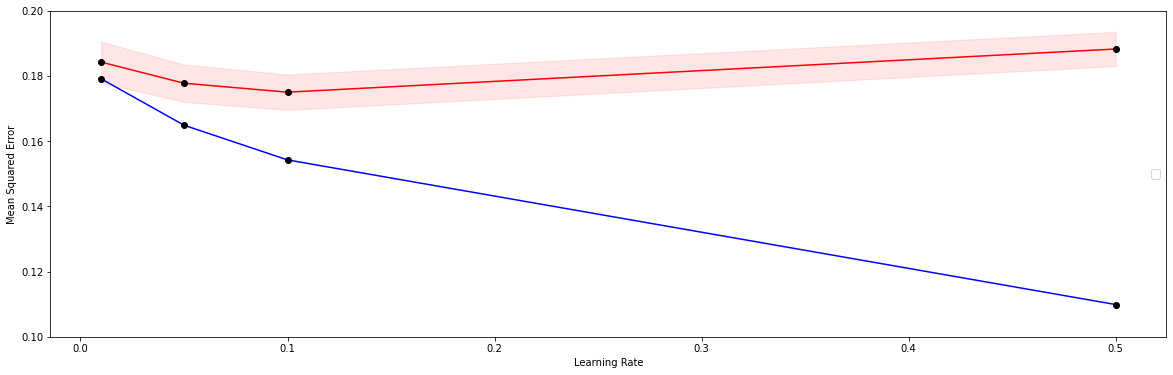

In [ ]:
#Plotting parameters for each learnninig rate
fig, ax = plt.subplots(1, 1, figsize=(20,6))

ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'], color='red')
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'], 'o', color='black')
ax.fill_between(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'] - xgb_tuning_1['CV Error Std'], xgb_tuning_1['Mean CV Error'] + xgb_tuning_1['CV Error Std'], color='r', alpha=.1)
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Training Error'], color='blue')
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Training Error'], 'o', color='black')
ax.legend(fontsize=12, loc = 'center right');
ax.set_ylim(0.1, 0.2)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Mean Squared Error')

In [ ]:
n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# **Best Model**

Changing the parameters a bit to obtain the best model

In [ ]:
xbgreg_best = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=5, min_child_weight=1 )
xbgreg_CV_best = -rmse_cv(xbgreg_best)
xbgreg_best.fit(X_train, y_train) 
y_train_xgbreg = xbgreg_best.predict(X_train)
y_test_xgbreg = xbgreg_best.predict(X_test)
xgb_best_results = pd.DataFrame({'algorithm':['XGBRegressor'],
            'CV error': xbgreg_CV_best.mean(), 
            'CV std': xbgreg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_xgbreg)],
            'test error': [mean_squared_error(y_test, y_test_xgbreg)],
            'training_r2_score': [r2_score(y_train, y_train_xgbreg)],
            'test_r2_score': [r2_score(y_test, y_test_xgbreg)]})
xgb_best_results

[14:09:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,XGBRegressor,0.173099,0.004799,0.117471,0.182283,0.744389,0.601344
